# Chapter 1
## Linear Algebra & Probability

In [13]:
import numpy as np # we need this to do linear algebra

# Matrices
Matrices are two-dimensional lists of numbers that contain rows and columns. Typically, rows in a matrix are denoted by i, while columns are denoted by j

In [14]:
matrix = np.array([[5, 6], [6, 9]])
print(matrix)

[[5 6]
 [6 9]]


# Tensors

While you may have heard of vectors and matrices before, the name tensor may be new. A tensor is a generalized matrix, and they have different sizes, or ranks, which measure their dimensions.

Tensors are three (or more)-dimensional lists; you can think of them as a sort of multi-dimensional object of numbers, such as a cube. Tensors have a unique transitive property and form; if a tensor transforms another entity, it too must transform. Any rank 2 tensor can be represented as a matrix, but not all matrices are automatically rank 2 tensors. A tensor must have this transitive property. As we'll see, this will come into play with neural networks in the next chapter. We can create tensors in Python such as the following: 

In [15]:
tensor = [[[1,2,3,4]],[[2,5,6,3]],[[7,6,3,4]]]
print(tensor)

[[[1, 2, 3, 4]], [[2, 5, 6, 3]], [[7, 6, 3, 4]]]


# Scalar Operations
Sclar operations involve a vector (or matrix) and a scalar.
To perform a scalar operation on a matrix, simply apply the scalar to every element of the matrix.

In [16]:
vector = np.array([[1, 2], [1, 2]])
for item in vector:
    print(item)

print('--------------------------------')

new_vector = vector + 2 # 2 is the scalar value
for item in new_vector:
    print(item)

[1 2]
[1 2]
--------------------------------
[3 4]
[3 4]


# Element-wise Operations

In element-wise operations, position matters. Values that correspond positionally are combined to create a new value.

In [17]:
vector_one = np.array([[1,2],[3,4]])
vector_two = np.array([[5,6],[7,8]])
print(vector_one + vector_two)
print('--------------------------------')
print(vector_one - vector_two)

[[ 6  8]
 [10 12]]
--------------------------------
[[-4 -4]
 [-4 -4]]


# Dot Product
The dot product is a special case of multiplication, and is rooted in larger theories of geometry that are used across the physical and computational sciences. It is a special case of a more general mathematical principle known as an inner product. When utilizing the dot product of two vectors, the output is a scalar.

In [18]:
vector_one = np.array([1,2,3])
vector_two = np.array([2,3,4])
print(np.dot(vector_one,vector_two)) # 20

20


# Hadamard Product
The Hadamard product, on the other hand, outputs a vector.


The Hadamard product is element-wise, meaning that the individual numbers in the new matrix are the scalar multiples of the numbers from the previous matrices. Looking back to Python, we can easily perform this operation in Python with a simple * operator

In [19]:
vector_one = np.array([1,2,3])
vector_two = np.array([2,3,4])
print(vector_one * vector_two) # [2, 6, 12]

[ 2  6 12]


# ========================================

# Iris Dataset - Supervised Learning Model

In [20]:
import pandas as pd
data = pd.read_csv('iris.csv')
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [27]:
# I generated this block with ChatGPT as the book version did not work correctly

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming 'data' is a pandas DataFrame containing your data
features = data.iloc[:, 0:4]
labels = data.iloc[:, 4]

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.25, random_state=50)

# Standardize the training set
scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)

# Standardize the test set using the same scaler
x_test_std = scaler.transform(x_test)


In [22]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=1000)
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [30]:
# I generated this block with ChatGPT as the book version did not work correctly

import numpy as np
import pandas as pd

# Assuming 'data' is a pandas DataFrame
numeric_data = data.select_dtypes(include=np.number)

# Standardize the numeric data
standardized_data = (numeric_data - numeric_data.mean()) / numeric_data.std()

# Calculate the correlation matrix
corr_matrix = standardized_data.corr()

print(corr_matrix)


              sepal.length  sepal.width  petal.length  petal.width
sepal.length      1.000000    -0.117570      0.871754     0.817941
sepal.width      -0.117570     1.000000     -0.428440    -0.366126
petal.length      0.871754    -0.428440      1.000000     0.962865
petal.width       0.817941    -0.366126      0.962865     1.000000


In [32]:
eigen_values, eigen_vectors = np.linalg.eig(corr_matrix)
print(eigen_values, eigen_vectors)

[2.91849782 0.91403047 0.14675688 0.02071484] [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [33]:
eigenpairs = [[eigen_values[i], eigen_vectors[:,i]] for i in range(len(eigen_vectors))]

eigenpairs.sort(reverse=True)

print(eigenpairs)

[[2.9184978165319944, array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654])], [0.9140304714680692, array([-0.37741762, -0.92329566, -0.02449161, -0.06694199])], [0.14675687557131536, array([-0.71956635,  0.24438178,  0.14212637,  0.63427274])], [0.02071483642861942, array([ 0.26128628, -0.12350962, -0.80144925,  0.52359713])]]


In [36]:
projection = np.hstack((eigenpairs[0][1].reshape(eigen_vectors.shape[1],1),
                                  eigenpairs[1][1].reshape(eigen_vectors.shape[1],1)))

In [38]:
transform = features.dot(projection)

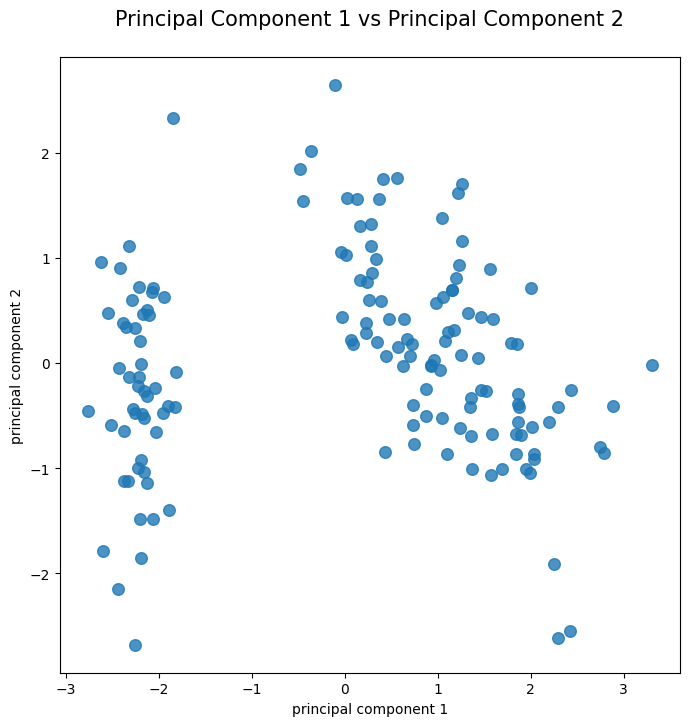

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(8, 8))
ax = fig.gca()

sns.regplot(x=transform.iloc[:, 0], y=transform.iloc[:, 1], fit_reg=False, scatter_kws={'s': 70}, ax=ax)

ax.set_xlabel('principal component 1', fontsize=10)
ax.set_ylabel('principal component 2', fontsize=10)
ax.set_title('Principal Component 1 vs Principal Component 2\n', fontsize=15)

plt.show()


In [47]:
predicted = rf_classifier.predict(x_test)
pd.crosstab(y_test, predicted, rownames=['Actual'], colnames=['Predicted'])

Predicted,Setosa,Versicolor,Virginica
Actual,,,
Setosa,11,0,0
Versicolor,0,14,1
Virginica,0,1,11
